In [151]:
"""Data points"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1000
X, _ = make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=1.0, random_state=42)

In [152]:
from sklearn.datasets import make_moons

n_samples = 1000
X2t, y = make_moons(n_samples=n_samples, noise=0.05)


additional_noise = np.random.normal(scale=0.2, size=X2t.shape)
X2 = X2t + additional_noise

In [153]:
n_samples = 1000
x = np.linspace(0, 4 * np.pi, n_samples)
y = np.sin(x) + np.random.normal(scale=0.1, size=x.shape)

thickness_noise = np.random.normal(scale=0.6, size=x.shape)

X3 = np.vstack((x + thickness_noise, y)).T

In [154]:
def calculate_distances(x, p):
    n_samples = x.shape[0]
    distances = np.zeros(n_samples)
    
    for i in range(n_samples):
        dist_sum = 0
        for j in range(n_samples):
            if i != j:
                dist_sum += np.linalg.norm(x[i] - x[j], ord=p)**p
        distances[i] = dist_sum  / n_samples 
    
    return distances

distances = calculate_distances(X, 2)

distances2 = calculate_distances(X2, 2)

distances3 = calculate_distances(X3, 2)



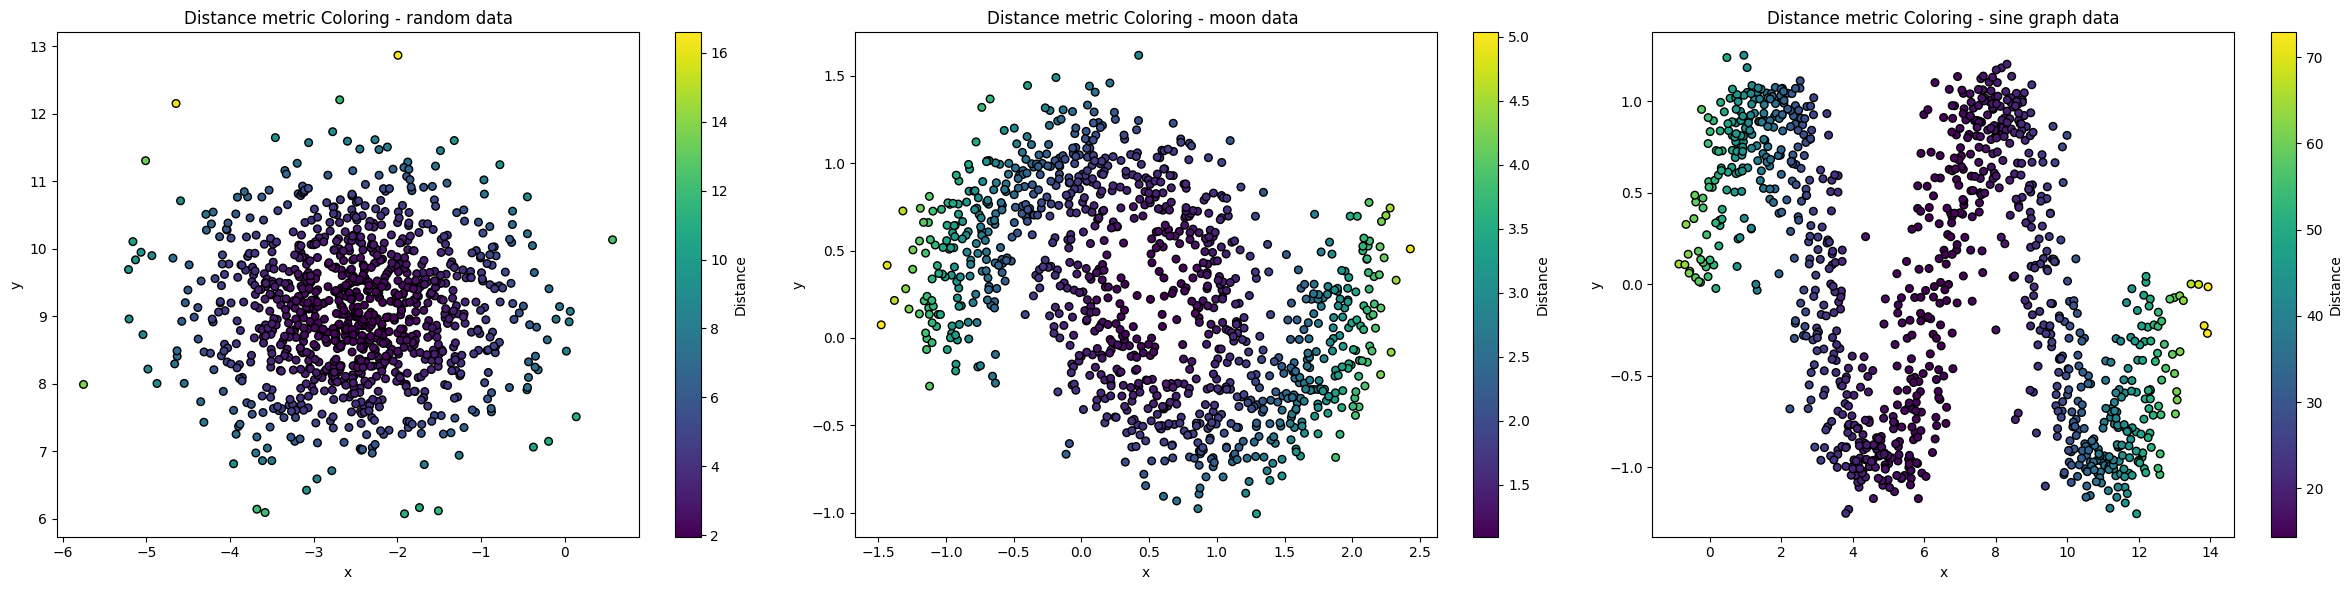

In [155]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1
scatter = axs[0].scatter(X[:, 0], X[:, 1], c=distances, cmap='viridis', s=30, edgecolor='k')
axs[0].set_title('Distance metric Coloring - random data')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(scatter, ax=axs[0], label='Distance')

# Plot 2
scatter = axs[1].scatter(X2[:, 0], X2[:, 1], c=distances2, cmap='viridis', s=30, edgecolor='k')
axs[1].set_title('Distance metric Coloring - moon data ')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(scatter, ax=axs[1], label='Distance')

# Plot 3 
scatter = axs[2].scatter(X3[:, 0], X3[:, 1], c=distances3, cmap='viridis', s=30, edgecolor='k')
axs[2].set_title('Distance metric Coloring - sine graph data')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
fig.colorbar(scatter, ax=axs[2], label='Distance')

plt.tight_layout()
plt.show()

In [156]:

# Ignore for now:

"""

def split_core_boundary(X, threshold):
    distances = calculate_distances(X)
    
    core_indices = np.where(distances <= threshold)[0]
    boundary_indices = np.where(distances > threshold)[0]
    
    core_points = X[core_indices]
    boundary_points = X[boundary_indices]
    
    return core_points, boundary_points

import matplotlib.pyplot as plt

core_threshold = np.percentile(calculate_distances(x), 70)  # Median threshold

core_points, boundary_points = split_core_boundary(x, core_threshold)

plt.scatter(core_points[:, 0], core_points[:, 1], c='blue', label='Core Points')
plt.scatter(boundary_points[:, 0], boundary_points[:, 1], c='green', label='Boundary Points')
plt.legend()
plt.show()"""

"\n\ndef split_core_boundary(X, threshold):\n    distances = calculate_distances(X)\n    \n    core_indices = np.where(distances <= threshold)[0]\n    boundary_indices = np.where(distances > threshold)[0]\n    \n    core_points = X[core_indices]\n    boundary_points = X[boundary_indices]\n    \n    return core_points, boundary_points\n\nimport matplotlib.pyplot as plt\n\ncore_threshold = np.percentile(calculate_distances(x), 70)  # Median threshold\n\ncore_points, boundary_points = split_core_boundary(x, core_threshold)\n\nplt.scatter(core_points[:, 0], core_points[:, 1], c='blue', label='Core Points')\nplt.scatter(boundary_points[:, 0], boundary_points[:, 1], c='green', label='Boundary Points')\nplt.legend()\nplt.show()"

# 3D plotting

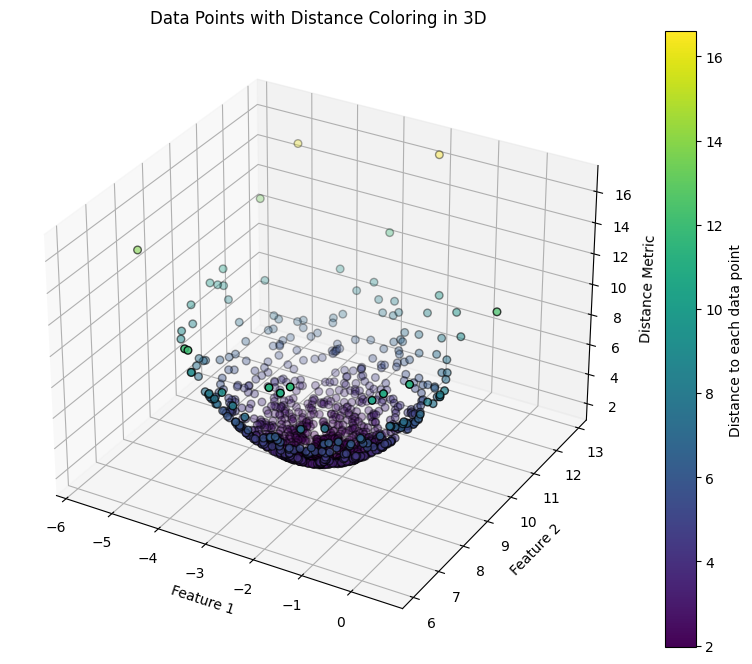

In [157]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], distances, c=distances, cmap='viridis', s=30, edgecolor='k')

ax.set_title('Data Points with Distance Coloring in 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Distance Metric')

fig.colorbar(scatter, ax=ax, label='Distance to each data point')

plt.show()